In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
# Abrimos nuestros archivo limpios 
ofisM= pd.read_csv(r"C:\Users\cfern\Desktop\ML Noya\oficinasMAD.csv")
ofisB= pd.read_csv(r"C:\Users\cfern\Desktop\ML Noya\oficinasBCN.csv")


In [4]:
#Creamos las 3 categorias de tamaños de oficinas para Madrid y Barcelona 
ofisM.drop(["Unnamed: 0"],axis=1,inplace=True)
ofisB.drop(["Unnamed: 0"],axis=1,inplace=True)
ofisM1= ofisM[ofisM["tamaños"]==1]
ofisM2= ofisM[ofisM["tamaños"]==2]
ofisM3= ofisM[ofisM["tamaños"]==3]
ofisB1= ofisB[ofisB["tamaños"]==1]
ofisB2= ofisB[ofisB["tamaños"]==2]
ofisB3= ofisB[ofisB["tamaños"]==3]

In [5]:
#Vamos a probar los los datos en funcion del tamaño de las demandas y haremos los 8 modelos de regresion.


#partimos los dataset 
#General  : demandas de oficinas Madrid  todos los tamaños
X_trainM, X_testM, y_trainM, y_testM = train_test_split(ofisM.drop('ad_price', axis=1),
                                                    ofisM['ad_price'],
                                                    test_size=0.2,
                                                    random_state=42)
#Tamaño 1 : demandas de oficinas de menos de 200m 
X_trainM1, X_testM1, y_trainM1, y_testM1 = train_test_split(ofisM1.drop('ad_price', axis=1),
                                                    ofisM1['ad_price'],
                                                    test_size=0.3,
                                                    random_state=42)
#Tamaño 2 : demandas de oficinas de  200m a 800m
X_trainM2, X_testM2, y_trainM2, y_testM2 = train_test_split(ofisM2.drop('ad_price', axis=1),
                                                    ofisM2['ad_price'],
                                                    test_size=0.3,
                                                    random_state=42)

#Tamaño 3 : demandas de oficinas de > 800m
X_trainM3, X_testM3, y_trainM3, y_testM3 = train_test_split(ofisM3.drop('ad_price', axis=1),
                                                    ofisM3['ad_price'],
                                                    test_size=0.2,
                                                    random_state=42)



In [6]:
#General  : demandas de oficinas BCN  todos los tamaños
X_trainB, X_testB, y_trainB, y_testB = train_test_split(ofisB.drop('ad_price', axis=1),
                                                    ofisB['ad_price'],
                                                    test_size=0.2,
                                                    random_state=42)
#Tamaño 1 : demandas de oficinas de menos de 200m 
X_trainB1, X_testB1, y_trainB1, y_testB1 = train_test_split(ofisB1.drop('ad_price', axis=1),
                                                    ofisB1['ad_price'],
                                                    test_size=0.3,
                                                    random_state=42)
#Tamaño 2 : demandas de oficinas de  200m a 800m
X_trainB2, X_testB2, y_trainB2, y_testB2 = train_test_split(ofisB2.drop('ad_price', axis=1),
                                                    ofisB2['ad_price'],
                                                    test_size=0.3,
                                                    random_state=42)

#Tamaño 3 : demandas de oficinas de > 800m
X_trainB3, X_testB3, y_trainB3, y_testB3 = train_test_split(ofisB3.drop('ad_price', axis=1),
                                                    ofisB3['ad_price'],
                                                    test_size=0.2,
                                                    random_state=42)

In [7]:
#Comprobamos que los trains tiene tamaño suficiente 
print(X_trainM.shape)
print(X_trainM1.shape)
print(X_trainM2.shape)
print(X_trainM3.shape)

print(X_trainB.shape)
print(X_trainB1.shape)
print(X_trainB2.shape)
print(X_trainB3.shape)

(4058, 10)
(714, 10)
(1930, 10)
(1035, 10)
(3910, 10)
(1233, 10)
(1644, 10)
(621, 10)


In [8]:
#Vamos aver la importancia de las columnas par Madrid  , parece que solo hay una columna importante para nuestro target
#En el analisis previo a acotar las fechas en el datframe veiamos que la altura de la oficina aportaba un 0.16
from sklearn.ensemble import RandomForestRegressor

names =X_trainM.columns
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_trainM, y_trainM)

scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)
pd.DataFrame(scores, columns=['Score', 'Feature'])

,Score,Feature
0,0.8906,ad_area
1,0.0507,censustract_id
2,0.0214,ad_longitude
3,0.0179,ad_latitude
4,0.0087,ad_postalcode
5,0.0071,ad_floornumber
6,0.0029,ad_bathnumber
7,0.0004,ad_hasparkingspace
8,0.0004,ad_haslift
9,0.0000,tamaños


In [9]:
#Vamos aver la importancia de las columnas para Barcelona   , parece que solo hay una columna importante para nuestro target
from sklearn.ensemble import RandomForestRegressor

names =X_trainM.columns
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_trainB, y_trainB)

scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)
pd.DataFrame(scores, columns=['Score', 'Feature'])

,Score,Feature
0,0.9430,ad_area
1,0.0160,ad_latitude
2,0.0128,ad_longitude
3,0.0093,ad_postalcode
4,0.0089,ad_floornumber
5,0.0058,censustract_id
6,0.0030,ad_bathnumber
7,0.0008,ad_haslift
8,0.0003,ad_hasparkingspace
9,0.0002,tamaños


In [10]:
#MODELO DE REGRESION LINEAR GENERAL
#**para Madrid **

# Almaceno en el objeto scaler todo lo necesario para estandarizar, con los datos de train
scalerM = StandardScaler()
scalerM.fit(X_trainM)

# Utilizo los datos de train para escalar train y test.
X_trainM_scaled = scalerM.transform(X_trainM)
X_testM_scaled = scalerM.transform(X_testM)


lrM = LinearRegression()
lrM.fit(X_trainM_scaled, y_trainM)
predsM = lrM.predict(X_testM_scaled)



print("Score LR General  : demandas de oficinas Madrid todos los tamaños (R^2):",lrM.score(X_trainM_scaled, y_trainM))
print("R^2 score testM:",r2_score(predsM, y_testM))
print("MAE score:", round(mean_absolute_error (predsM, y_testM), 4))
print("MSE score:", round(mean_squared_error (predsM, y_testM), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error (predsM, y_testM)), 4))

Score LR General  : demandas de oficinas Madrid todos los tamaños (R^2): 0.8781695779031319
R^2 score testM: 0.8094153181302741
MAE score: 3331.8264
MSE score: 38886673.3398
RMSE score: 6235.918


In [11]:

#**para Madrid Tamaño 1: oficinas <200m**

scalerM1 = StandardScaler()
scalerM1.fit(X_trainM1)

X_trainM1_scaled = scalerM1.transform(X_trainM1)
X_testM1_scaled = scalerM1.transform(X_testM1)


lrM1 = LinearRegression()
lrM1.fit(X_trainM1_scaled, y_trainM1)
predsM1 = lrM1.predict(X_testM1_scaled)



print("Score LR General  : demandas de oficinas Madrid <200 (R^2):",lrM1.score(X_trainM1_scaled, y_trainM1))
print("R^2 score testM:",r2_score(predsM1, y_testM1))
print("MAE score:", round(mean_absolute_error (predsM1, y_testM1), 4))
print("MSE score:", round(mean_squared_error (predsM1, y_testM1), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error (predsM1, y_testM1)), 4))

Score LR General  : demandas de oficinas Madrid <200 (R^2): 0.5859265598816232
R^2 score testM: -0.21383353508741187
MAE score: 579.9638
MSE score: 810005.7505
RMSE score: 900.0032


In [12]:

#**para Madrid Tamaño 2: oficinas 200m -400m**

scalerM2 = StandardScaler()
scalerM2.fit(X_trainM2)

X_trainM2_scaled = scalerM2.transform(X_trainM2)
X_testM2_scaled = scalerM2.transform(X_testM2)


lrM2 = LinearRegression()
lrM2.fit(X_trainM2_scaled, y_trainM2)
predsM2 = lrM2.predict(X_testM2_scaled)



print("Score LR General  : demandas de oficinas Madrid 200_400m (R^2):",lrM2.score(X_trainM2_scaled, y_trainM2))
print("R^2 score testM:",r2_score(predsM2, y_testM2))
print("MAE score:", round(mean_absolute_error (predsM2, y_testM2), 4))
print("MSE score:", round(mean_squared_error (predsM2, y_testM2), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error (predsM2, y_testM2)), 4))

Score LR General  : demandas de oficinas Madrid 200_400m (R^2): 0.6259774770126731
R^2 score testM: 0.36571566724822135
MAE score: 2077.8243
MSE score: 8393185.3528
RMSE score: 2897.0995


In [13]:
#**para Madrid Tamaño 3: oficinas >800m**

scalerM3 = StandardScaler()
scalerM3.fit(X_trainM3)

X_trainM3_scaled = scalerM3.transform(X_trainM3)
X_testM3_scaled = scalerM3.transform(X_testM3)


lrM3 = LinearRegression()
lrM3.fit(X_trainM3_scaled, y_trainM3)
predsM3 = lrM3.predict(X_testM3_scaled)



print("Score LR General  : demandas de oficinas Madrid 200_400m (R^2):",lrM3.score(X_trainM3_scaled, y_trainM3))
print("R^2 score testM:",r2_score(predsM3, y_testM3))
print("MAE score:", round(mean_absolute_error (predsM3, y_testM3), 4))
print("MSE score:", round(mean_squared_error (predsM3, y_testM3), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error (predsM3, y_testM3)), 4))

Score LR General  : demandas de oficinas Madrid 200_400m (R^2): 0.8398264422471475
R^2 score testM: 0.7281629420899511
MAE score: 6789.5752
MSE score: 100013097.831
RMSE score: 10000.6549


In [14]:
#MODELO DE REGRESION LINEAR GENERAL
#**para BCN**

# Almaceno en el objeto scaler todo lo necesario para estandarizar, con los datos de train
scalerB = StandardScaler()
scalerB.fit(X_trainB)

# Utilizo los datos de train para escalar train y test.
X_trainB_scaled = scalerB.transform(X_trainB)
X_testB_scaled = scalerB.transform(X_testB)


lrB = LinearRegression()
lrB.fit(X_trainB_scaled, y_trainB)
predsB = lrB.predict(X_testB_scaled)



print("Score LR General  : demandas de oficinas Madrid todos los tamaños (R^2):",lrB.score(X_trainB_scaled, y_trainB))
print("R^2 score testM:",r2_score(predsB, y_testB))
print("MAE score:", round(mean_absolute_error (predsB, y_testB), 4))
print("MSE score:", round(mean_squared_error (predsB, y_testB), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error (predsB, y_testB)), 4))

Score LR General  : demandas de oficinas Madrid todos los tamaños (R^2): 0.9149648787242418
R^2 score testM: 0.9092132911469216
MAE score: 1967.0125
MSE score: 16622014.4309
RMSE score: 4077.0105


In [15]:
#**para Barcelona Tamaño 1: oficinas <200m**

scalerB1 = StandardScaler()
scalerB1.fit(X_trainB1)


X_trainB1_scaled = scalerB1.transform(X_trainB1)
X_testB1_scaled = scalerB1.transform(X_testB1)


lrB1 = LinearRegression()
lrB1.fit(X_trainB1_scaled, y_trainB1)
predsB1 = lrB.predict(X_testB1_scaled)



print("Score LR General  : demandas de oficinas Barcelona <200m (R^2):",lrB1.score(X_trainB1_scaled, y_trainB1))
print("R^2 score testM:",r2_score(predsB1, y_testB1))
print("MAE score:", round(mean_absolute_error (predsB1, y_testB1), 4))
print("MSE score:", round(mean_squared_error (predsB1, y_testB1), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error (predsB1, y_testB1)), 4))

Score LR General  : demandas de oficinas Barcelona <200m (R^2): 0.4983207864436684
R^2 score testM: -0.2005187923304239
MAE score: 11366.0979
MSE score: 197682673.9078
RMSE score: 14059.9671


In [16]:
#**para Barcelona  Tamaño 2: oficinas 200m - 400m**

scalerB2 = StandardScaler()
scalerB2.fit(X_trainB2)


X_trainB2_scaled = scalerB2.transform(X_trainB2)
X_testB2_scaled = scalerB2.transform(X_testB2)


lrB2 = LinearRegression()
lrB2.fit(X_trainB2_scaled, y_trainB2)
predsB2 = lrB2.predict(X_testB2_scaled)



print("Score LR General  : demandas de oficinas Madrid 200-800m (R^2):",lrB2.score(X_trainB2_scaled, y_trainB2))
print("R^2 score testM:",r2_score(predsB2, y_testB2))
print("MAE score:", round(mean_absolute_error (predsB2, y_testB2), 4))
print("MSE score:", round(mean_squared_error (predsB2, y_testB2), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error (predsB2, y_testB2)), 4))

Score LR General  : demandas de oficinas Madrid 200-800m (R^2): 0.6911588464363209
R^2 score testM: 0.40662829046456017
MAE score: 1685.6641
MSE score: 6607353.4866
RMSE score: 2570.4773


In [17]:
#**para Barcelona  Tamaño 3: oficinas >800m**

scalerB3 = StandardScaler()
scalerB3.fit(X_trainB3)

X_trainB3_scaled = scalerB3.transform(X_trainB3)
X_testB3_scaled = scalerB3.transform(X_testB3)


lrB3 = LinearRegression()
lrB3.fit(X_trainB3_scaled, y_trainB3)
predsB3 = lrB3.predict(X_testB3_scaled)



print("Score LR General  : demandas de oficinas Madrid todos los tamaños (R^2):",lrB3.score(X_trainB3_scaled, y_trainB3))
print("R^2 score testM:",r2_score(predsB3, y_testB3))
print("MAE score:", round(mean_absolute_error (predsB3, y_testB3), 4))
print("MSE score:", round(mean_squared_error (predsB3, y_testB3), 4))
print("RMSE score:", round(np.sqrt(mean_squared_error (predsB3, y_testB3)), 4))

Score LR General  : demandas de oficinas Madrid todos los tamaños (R^2): 0.8619999391063444
R^2 score testM: 0.7951604151060515
MAE score: 6386.7213
MSE score: 99023434.5195
RMSE score: 9951.0519


Text(0.5, 1.0, 'Predicciones BCN de >800m')

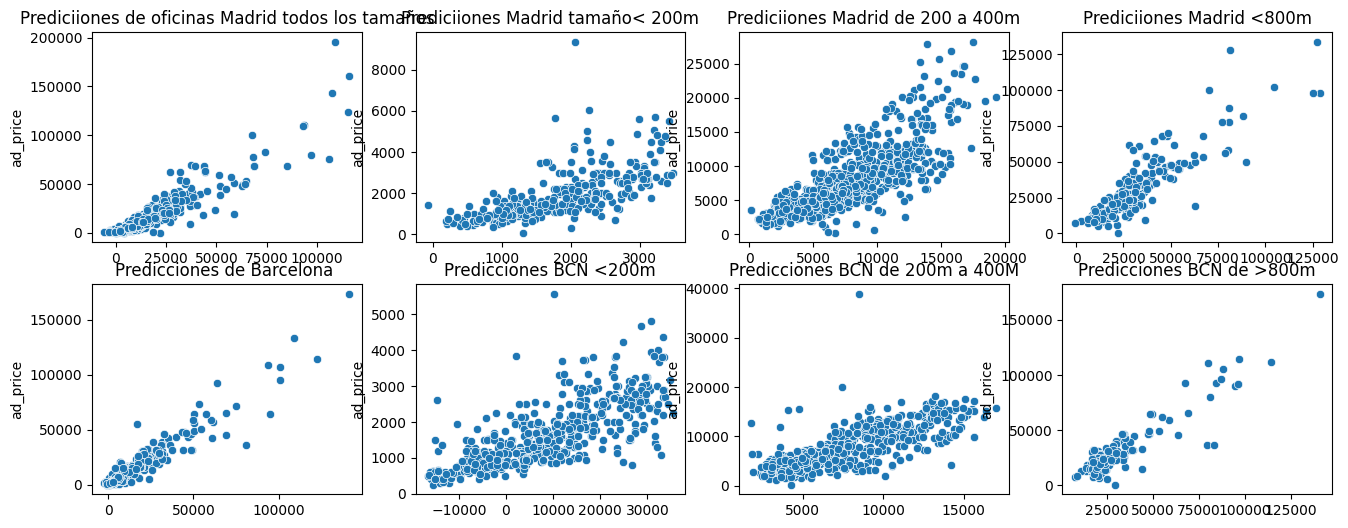

In [18]:
#Dibujamos las predicciones en test en cada reresion , cuando mas se acerquen a la diagonal , mejor son la predicciones 
fig, axes = plt.subplots(2, 4, figsize=(16, 6))


sns.scatterplot(x=predsM, y=y_testM, ax=axes[0, 0])
axes[0, 0].set_title("Prediciiones de oficinas Madrid todos los tamaños")

sns.scatterplot(x=predsM1, y=y_testM1,ax=axes[0, 1])
axes[0, 1].set_title("Prediciiones Madrid tamaño< 200m")

sns.scatterplot(x=predsM2, y=y_testM2,ax=axes[0, 2])
axes[0, 2].set_title("Prediciiones Madrid de 200 a 400m")

sns.scatterplot(x=predsM3, y=y_testM3,ax=axes[0, 3])
axes[0, 3].set_title("Prediciiones Madrid <800m")

sns.scatterplot(x=predsB, y=y_testB,ax=axes[1, 0])
axes[1, 0].set_title("Predicciones de Barcelona ")

sns.scatterplot(x=predsB1, y=y_testB1,ax=axes[1, 1])
axes[1, 1].set_title("Predicciones BCN <200m")

sns.scatterplot(x=predsB2, y=y_testB2,ax=axes[1, 2])
axes[1, 2].set_title("Predicciones BCN de 200m a 400M")

sns.scatterplot(x=predsB3, y=y_testB3,ax=axes[1, 3])
axes[1, 3].set_title("Predicciones BCN de >800m")